<a href="https://colab.research.google.com/github/parthhasstartedcoding/Financial-Programming/blob/main/VaR_Modelling_of_ITC_Limited.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project Description: Comprehensive Risk Management and Volatility Forecasting

This project focuses on implementing various Value-at-Risk (VaR) methods and volatility forecasting models to assess market risk and enhance risk management strategies. The analysis was applied to ITC Limited's stock returns, using different approaches for VaR calculation, including Historical VaR, Parametric VaR, and Monte Carlo VaR, alongside GARCH simulations and backtesting.
Key Components:

    Historical VaR: Calculated based on the empirical distribution of past returns, providing a simple yet effective approach to estimate potential losses based on historical data.
    Parametric VaR: Implemented using the assumption of normally distributed returns. The model computes VaR using the mean and standard deviation of historical returns, giving a straightforward estimation of potential market risk.
    Monte Carlo VaR: Employed Monte Carlo simulations to generate a wide range of potential future price paths for ITC Limited, allowing for a more flexible, non-parametric approach to estimate VaR and better capture market behavior under uncertainty.
    GARCH Simulation: Applied the GARCH (Generalized Autoregressive Conditional Heteroskedasticity) model to capture volatility clustering and forecast future volatility. The EGARCH variant was used to account for asymmetry in volatility, allowing for more accurate risk forecasting in the presence of market shocks.
    Backtesting: Conducted backtesting of the VaR models by comparing forecasted VaR with actual realized returns over a specified period. This involved calculating the number of breaches (instances where actual returns exceeded the predicted VaR) and performing the Kupiec Likelihood Ratio Tes
    t to statistically validate the model's accuracy.

Outcomes:

    Risk Predictions: The project provided risk estimates over different time horizons (1-day, 10-day, and 30-day), with each model offering unique insights into the market risk of ITC Limited's stock.
    Model Validation: Backtesting confirmed the performance of the VaR models, with the Kupiec test showing the consistency of observed breaches with the expected frequency based on the chosen confidence level.
    Volatility Insights: The GARCH model successfully captured volatility clustering, showing how periods of high volatility were followed by other high-volatility periods, a key feature in financial markets.

Tools & Techniques:

    Python
    yfinance for data collection
    arch package for GARCH modeling
    NumPy, pandas for data manipulation
    Matplotlib for visualization
    Monte Carlo simulations for non-parametric risk modeling
    Statistical backtesting with the Kupiec Test

[*********************100%***********************]  1 of 1 completed


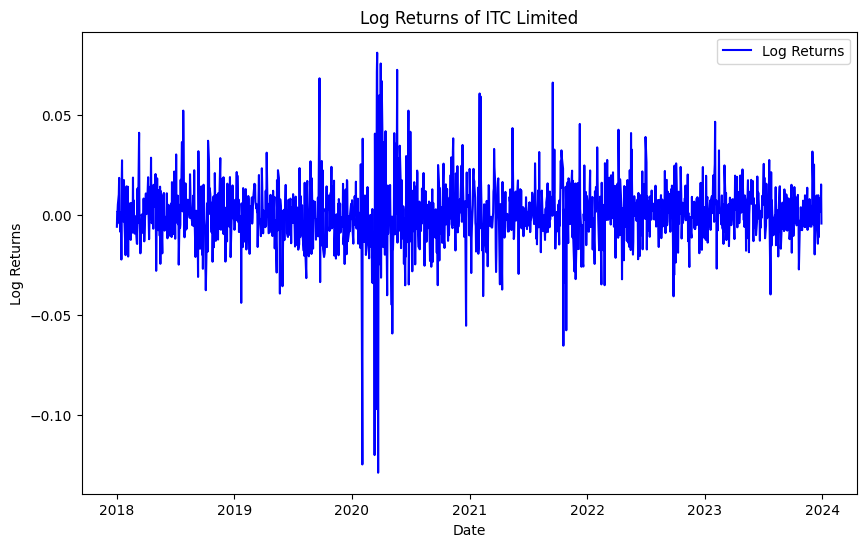

ADF Statistic: -11.204863930755003
p-value: 2.1975703788597472e-20
Price     Adj Close        Close         High          Low         Open  \
Ticker       ITC.NS       ITC.NS       ITC.NS       ITC.NS       ITC.NS   
count   1480.000000  1480.000000  1480.000000  1480.000000  1480.000000   
mean     243.254661   277.406047   280.322601   274.716283   277.709358   
std       84.495964    78.830373    79.073833    78.392624    78.758588   
min      119.360802   147.250000   152.000000   134.600006   148.000000   
25%      187.851467   214.224998   216.862495   211.800003   214.487499   
50%      215.573029   265.824997   268.225006   263.100006   266.050003   
75%      260.275558   306.612488   308.949989   303.574989   307.000000   
max      476.573608   492.149994   499.700012   487.000000   493.450012   

Price         Volume  Log Returns  
Ticker        ITC.NS               
count   1.480000e+03  1480.000000  
mean    1.825954e+07     0.000528  
std     1.491821e+07     0.016003  
mi

In [ ]:

import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Fetch historical data for ITC
ticker = "ITC.NS"  # Adjust the ticker for NSE or ITC's listing on another exchange
start_date = "2018-01-01"  # Choose start date for data
end_date = "2023-12-31"    # End date for analysis

# Download the data
data = yf.download(ticker, start=start_date, end=end_date)

# Calculate log returns
data['Log Returns'] = np.log(data['Adj Close'] / data['Adj Close'].shift(1))
data.dropna(inplace=True)

# Plot log returns
plt.figure(figsize=(10, 6))
plt.plot(data['Log Returns'], label='Log Returns', color='blue')
plt.title("Log Returns of ITC Limited")
plt.xlabel("Date")
plt.ylabel("Log Returns")
plt.legend()
plt.show()

# Conduct Augmented Dickey-Fuller Test for stationarity
adf_test = adfuller(data['Log Returns'].dropna())
print("ADF Statistic:", adf_test[0])
print("p-value:", adf_test[1])

# Show the data summary
print(data.describe())


Enter confidence levels separated by commas (e.g., 0.95, 0.99): 0.90,0.95,0.99
Historical VaR at 90% confidence level: 0.0160
Interpreted as a 90.0% chance that daily losses will not exceed 1.60%

Historical VaR at 95% confidence level: 0.0210
Interpreted as a 95.0% chance that daily losses will not exceed 2.10%

Historical VaR at 99% confidence level: 0.0380
Interpreted as a 99.0% chance that daily losses will not exceed 3.80%


--- VaR Results ---
Confidence Level (%) VaR (%)             
90                   1.60                
95                   2.10                
99                   3.80                


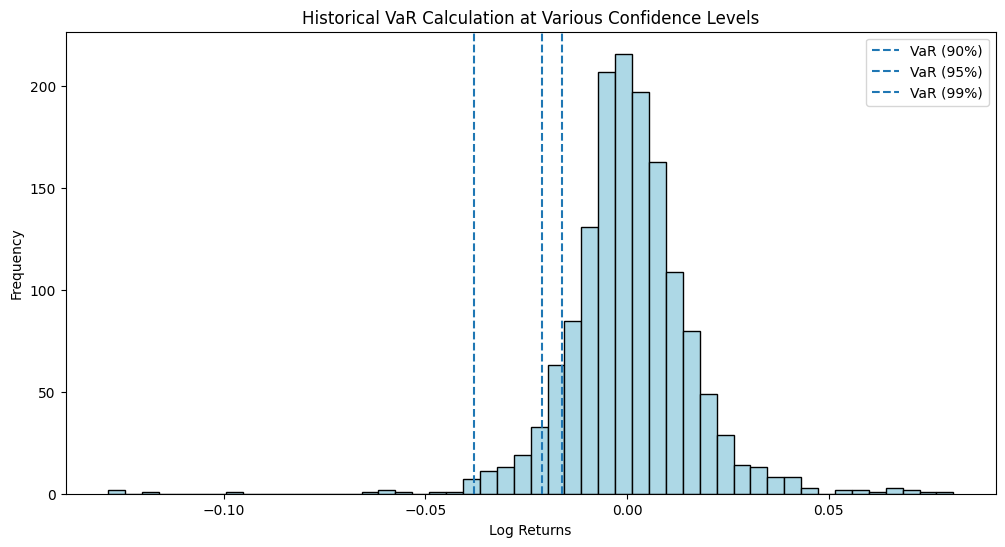

In [ ]:
# Import necessary libraries if not already imported
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate and display Historical VaR at multiple confidence levels
def calculate_historical_var(data, confidence_levels):
    var_results = {}
    for level in confidence_levels:
        var_level = (1 - level) * 100
        historical_var = np.percentile(data['Log Returns'].dropna(), var_level)
        var_results[level] = historical_var
        historical_var_abs = abs(historical_var)

        # Display the VaR result and interpretive message
        print(f"Historical VaR at {int(level * 100)}% confidence level: {-historical_var:.4f}")
        print(f"Interpreted as a {level * 100}% chance that daily losses will not exceed {historical_var_abs * 100:.2f}%\n")

    # Display the results in a tabular format
    print("\n--- VaR Results ---")
    print("{:<20} {:<20}".format("Confidence Level (%)", "VaR (%)"))
    for level, var in var_results.items():
        print("{:<20} {:<20.2f}".format(int(level * 100), abs(var) * 100))

    return var_results

# Prompt the user for multiple confidence levels
try:
    confidence_input = input("Enter confidence levels separated by commas (e.g., 0.95, 0.99): ")
    confidence_levels = [float(level.strip()) for level in confidence_input.split(",") if 0 < float(level.strip()) < 1]

    # Validate if confidence levels are entered correctly
    if not confidence_levels:
        print("Please enter valid confidence levels between 0 and 1.")
    else:
        # Calculate and store VaR results for each confidence level
        var_results = calculate_historical_var(data, confidence_levels)

        # Plot histogram with VaR lines for each confidence level
        plt.figure(figsize=(12, 6))
        plt.hist(data['Log Returns'], bins=50, color='lightblue', edgecolor='black')
        for level, var in var_results.items():
            plt.axvline(x=var, linestyle='--', label=f'VaR ({int(level * 100)}%)')

        plt.title("Historical VaR Calculation at Various Confidence Levels")
        plt.xlabel("Log Returns")
        plt.ylabel("Frequency")
        plt.legend()
        plt.show()

except ValueError:
    print("Invalid input. Please enter numeric values for confidence levels.")


Enter confidence levels separated by commas (e.g., 0.95, 0.99): 0.90,0.95,0.99
Mean of returns: 0.0005
Standard deviation of returns: 0.0160

Parametric VaR at 90% confidence level: 0.0200
Interpreted as a 90.0% chance that daily losses will not exceed 2.00%

Parametric VaR at 95% confidence level: 0.0258
Interpreted as a 95.0% chance that daily losses will not exceed 2.58%

Parametric VaR at 99% confidence level: 0.0367
Interpreted as a 99.0% chance that daily losses will not exceed 3.67%


--- Parametric VaR Results ---
Confidence Level (%) VaR (%)             
90                   2.00                
95                   2.58                
99                   3.67                


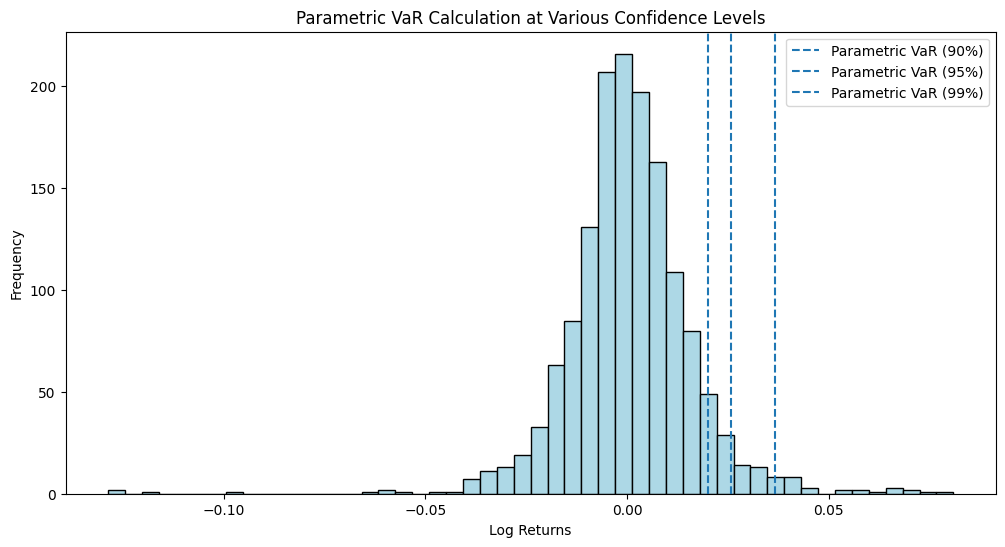

In [ ]:
from scipy.stats import norm
import matplotlib.pyplot as plt

# Function to calculate and display Parametric VaR at multiple confidence levels with visualization
def calculate_parametric_var(data, confidence_levels):
    mean_return = data['Log Returns'].mean()
    std_dev = data['Log Returns'].std()

    print(f"Mean of returns: {mean_return:.4f}")
    print(f"Standard deviation of returns: {std_dev:.4f}\n")

    var_results = {}
    for level in confidence_levels:
        # Calculate the z-score for the confidence level
        z_score = norm.ppf(1 - level)

        # Calculate VaR
        parametric_var = -(mean_return + z_score * std_dev)
        var_results[level] = parametric_var
        parametric_var_abs = abs(parametric_var)

        # Display the VaR result and interpretive message
        print(f"Parametric VaR at {int(level * 100)}% confidence level: {parametric_var:.4f}")
        print(f"Interpreted as a {level * 100}% chance that daily losses will not exceed {parametric_var_abs * 100:.2f}%\n")

    # Display the results in a tabular format
    print("\n--- Parametric VaR Results ---")
    print("{:<20} {:<20}".format("Confidence Level (%)", "VaR (%)"))
    for level, var in var_results.items():
        print("{:<20} {:<20.2f}".format(int(level * 100), abs(var) * 100))

    # Visualization
    plt.figure(figsize=(12, 6))
    plt.hist(data['Log Returns'], bins=50, color='lightblue', edgecolor='black')
    for level, var in var_results.items():
        plt.axvline(x=var, linestyle='--', label=f'Parametric VaR ({int(level * 100)}%)')

    plt.title("Parametric VaR Calculation at Various Confidence Levels")
    plt.xlabel("Log Returns")
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()

    return var_results

# Prompt the user for multiple confidence levels for Parametric VaR calculation
try:
    confidence_input = input("Enter confidence levels separated by commas (e.g., 0.95, 0.99): ")
    confidence_levels = [float(level.strip()) for level in confidence_input.split(",") if 0 < float(level.strip()) < 1]

    # Validate if confidence levels are entered correctly
    if not confidence_levels:
        print("Please enter valid confidence levels between 0 and 1.")
    else:
        # Calculate and store Parametric VaR results for each confidence level
        parametric_var_results = calculate_parametric_var(data, confidence_levels)

except ValueError:
    print("Invalid input. Please enter numeric values for confidence levels.")


[*********************100%***********************]  1 of 1 completed


Monte Carlo VaR at 95% confidence level over 1-day horizon: 2.63%
This indicates a 95% chance that losses will not exceed 2.63% over a 1-day period.



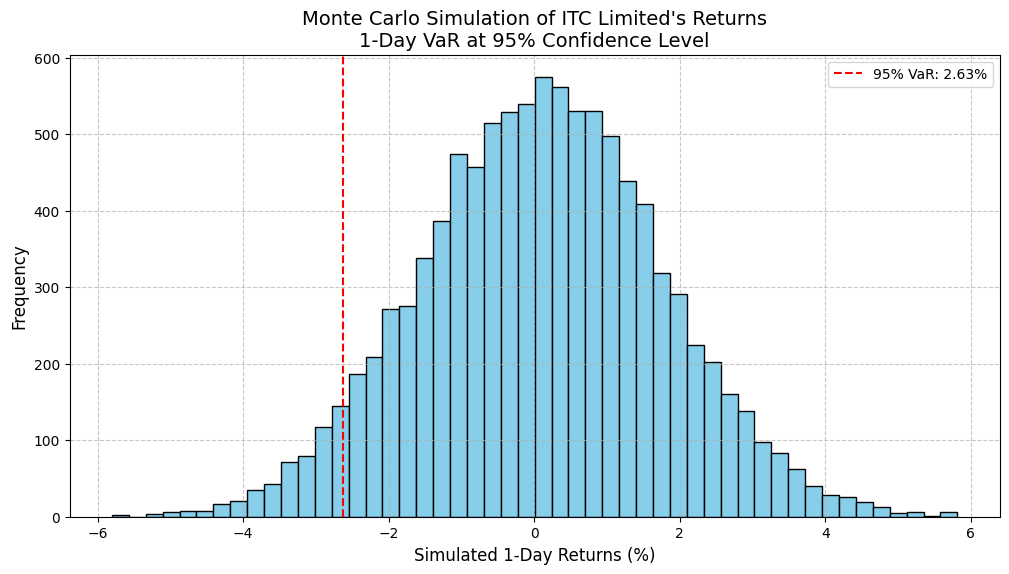

Monte Carlo VaR at 95% confidence level over 10-day horizon: 7.59%
This indicates a 95% chance that losses will not exceed 7.59% over a 10-day period.



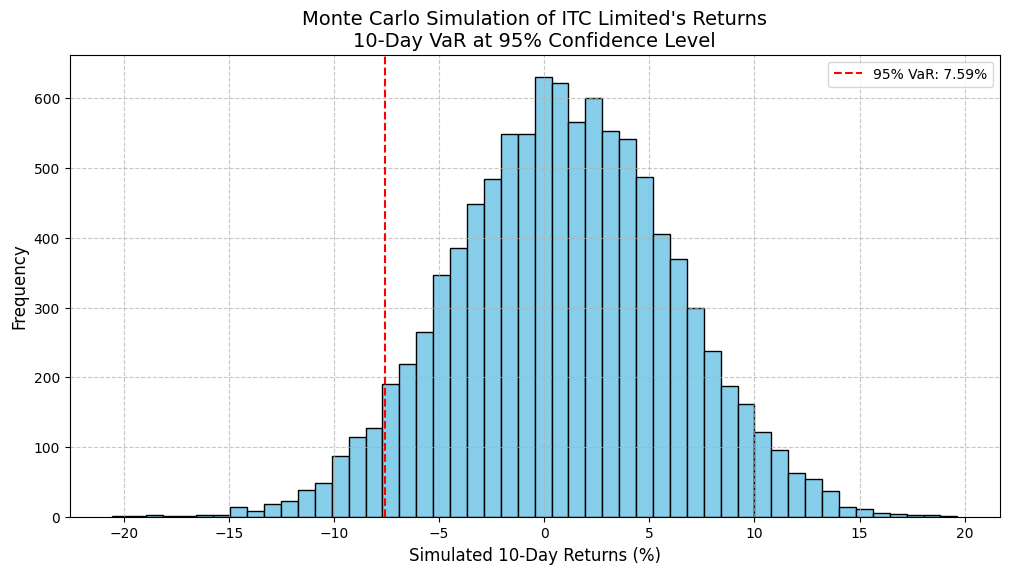

Monte Carlo VaR at 95% confidence level over 30-day horizon: 12.24%
This indicates a 95% chance that losses will not exceed 12.24% over a 30-day period.



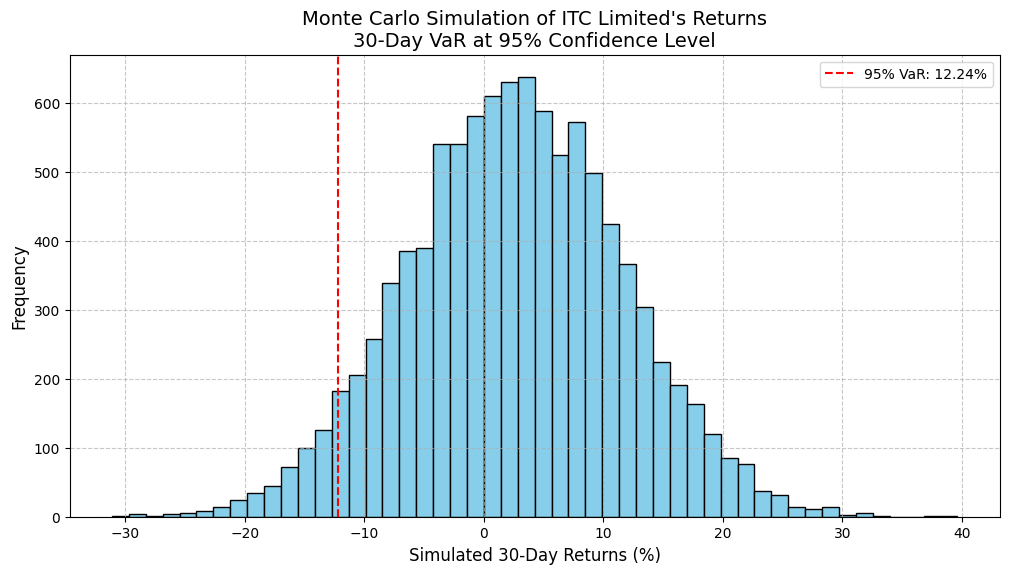

In [36]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Step 1: Data Collection
ticker = 'ITC.NS'  # ITC Limited's ticker symbol on NSE
data = yf.download(ticker, start='2020-01-01', end='2024-11-09')  # Adjust dates as needed

# Step 2: Data Preparation
data['Daily Returns (%)'] = (data['Adj Close'].pct_change()) * 100  # Percentage change in daily returns
data = data.dropna()  # Remove missing values

# Step 3: Monte Carlo Simulation
mean_return = data['Daily Returns (%)'].mean()
std_dev = data['Daily Returns (%)'].std()
num_simulations = 10000

# Step 4: Function to Simulate and Calculate VaR for Different Time Horizons
def monte_carlo_var(time_horizon):
    # Simulate returns for the given time horizon
    simulated_returns = np.random.normal(mean_return, std_dev, (num_simulations, time_horizon))

    # Calculate the cumulative returns for multi-day horizons
    simulated_end_returns = np.sum(simulated_returns, axis=1)  # Sum of daily returns for the horizon

    # VaR Calculation at 95% confidence level
    confidence_level = 0.95
    var_percentile = (1 - confidence_level) * 100
    monte_carlo_var_value = np.percentile(simulated_end_returns, var_percentile)

    # Display results
    print(f"Monte Carlo VaR at 95% confidence level over {time_horizon}-day horizon: {-monte_carlo_var_value:.2f}%")
    print(f"This indicates a 95% chance that losses will not exceed {abs(monte_carlo_var_value):.2f}% over a {time_horizon}-day period.\n")

    # Visualization
    plt.figure(figsize=(12, 6))
    plt.hist(simulated_end_returns, bins=50, color='skyblue', edgecolor='black')
    plt.axvline(x=monte_carlo_var_value, linestyle='--', color='red', label=f'95% VaR: {abs(monte_carlo_var_value):.2f}%')
    plt.title(f"Monte Carlo Simulation of ITC Limited's Returns\n{time_horizon}-Day VaR at 95% Confidence Level", fontsize=14)
    plt.xlabel(f"Simulated {time_horizon}-Day Returns (%)", fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

# Step 5: Run Simulations for Different Time Horizons (1-day, 10-day, 30-day)
for time_horizon in [1, 10, 30]:
    monte_carlo_var(time_horizon)


In [37]:
pip install arch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 985.1/985.1 kB 38.3 MB/s eta 0:00:00


[*********************100%***********************]  1 of 1 completed


                     Constant Mean - GARCH Model Results                      
Dep. Variable:      Daily Returns (%)   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -2171.86
Distribution:                  Normal   AIC:                           4351.72
Method:            Maximum Likelihood   BIC:                           4372.09
                                        No. Observations:                 1203
Date:                Sat, Nov 09 2024   Df Residuals:                     1202
Time:                        15:25:43   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.1048  4.036e-02      2.597  9.407e-03 [2.571e-0

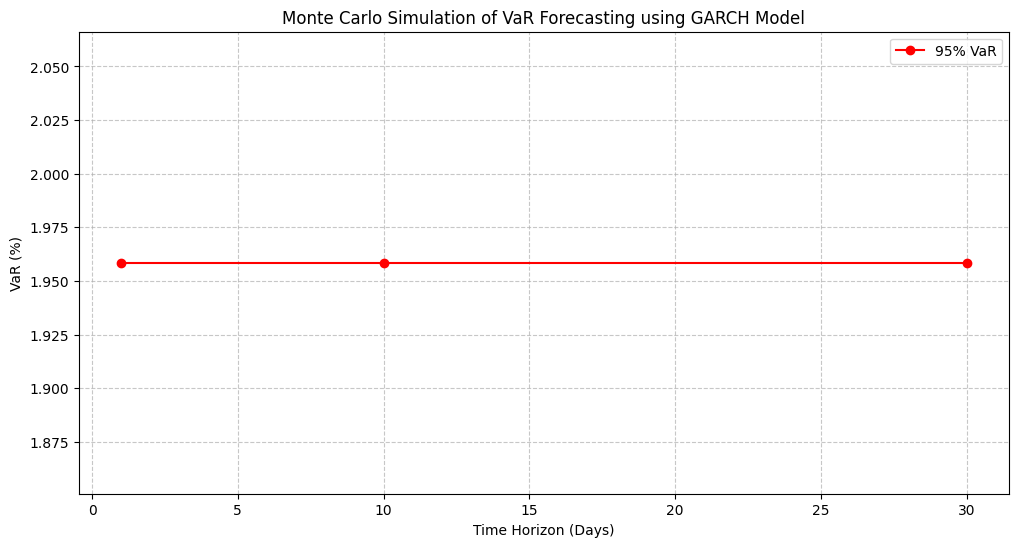

In [40]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from arch import arch_model

# Step 1: Data Collection
ticker = 'ITC.NS'  # ITC Limited's ticker symbol on NSE
data = yf.download(ticker, start='2020-01-01', end='2024-11-09')  # Adjust dates as needed

# Step 2: Data Preparation
data['Daily Returns (%)'] = (data['Adj Close'].pct_change()) * 100  # Percentage change in daily returns
data = data.dropna()  # Remove missing values

# Step 3: GARCH Model Estimation
# Fit a GARCH(1, 1) model
returns = data['Daily Returns (%)']
model = arch_model(returns, vol='Garch', p=1, q=1)
model_fit = model.fit(disp="off")

# Print the summary of the model
print(model_fit.summary())

# Step 4: Forecast Volatility for Different Horizons (1-day, 10-day, 30-day)
# Forecast 1-day, 10-day, and 30-day volatility
forecast_horizon = [1, 10, 30]
forecast_volatility = {}

for horizon in forecast_horizon:
    # Forecast volatility for the given horizon
    forecast = model_fit.forecast(horizon=horizon)
    forecast_volatility[horizon] = np.sqrt(forecast.variance.values[-1, :])

# Step 5: Calculate VaR using the Forecasted Volatility (Assuming Normal Distribution)
confidence_level = 0.95
z_score = np.abs(np.percentile(np.random.normal(0, 1, 10000), (1 - confidence_level) * 100))  # Z-score for the 95% confidence level

# VaR values for each time horizon (1-day, 10-day, 30-day)
var_values = {}
for horizon in forecast_horizon:
    var_values[horizon] = z_score * forecast_volatility[horizon][0]  # Take the first value as the VaR for that horizon

# Step 6: Display Results (Corrected)
for horizon in forecast_horizon:
    print(f"\nForecasted {horizon}-day VaR at 95% confidence level: {-var_values[horizon]:.2f}%")

# Step 7: Visualization (Fixing the plotting part)
plt.figure(figsize=(12, 6))
plt.plot(forecast_horizon, list(var_values.values()), marker='o', color='red', linestyle='-', label='95% VaR')
plt.title('Monte Carlo Simulation of VaR Forecasting using GARCH Model')
plt.xlabel('Time Horizon (Days)')
plt.ylabel('VaR (%)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


[*********************100%***********************]  1 of 1 completed


                     Constant Mean - EGARCH Model Results                     
Dep. Variable:      Daily Returns (%)   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                     EGARCH   Log-Likelihood:               -2177.78
Distribution:                  Normal   AIC:                           4363.57
Method:            Maximum Likelihood   BIC:                           4383.94
                                        No. Observations:                 1203
Date:                Sat, Nov 09 2024   Df Residuals:                     1202
Time:                        15:28:46   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0998  2.234e-03     44.672      0.000 [9.541e-0

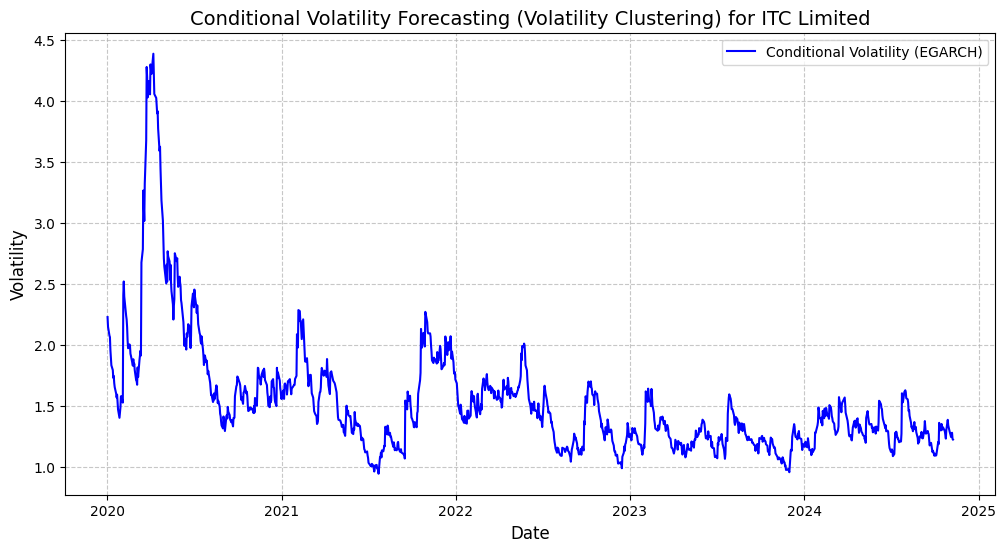

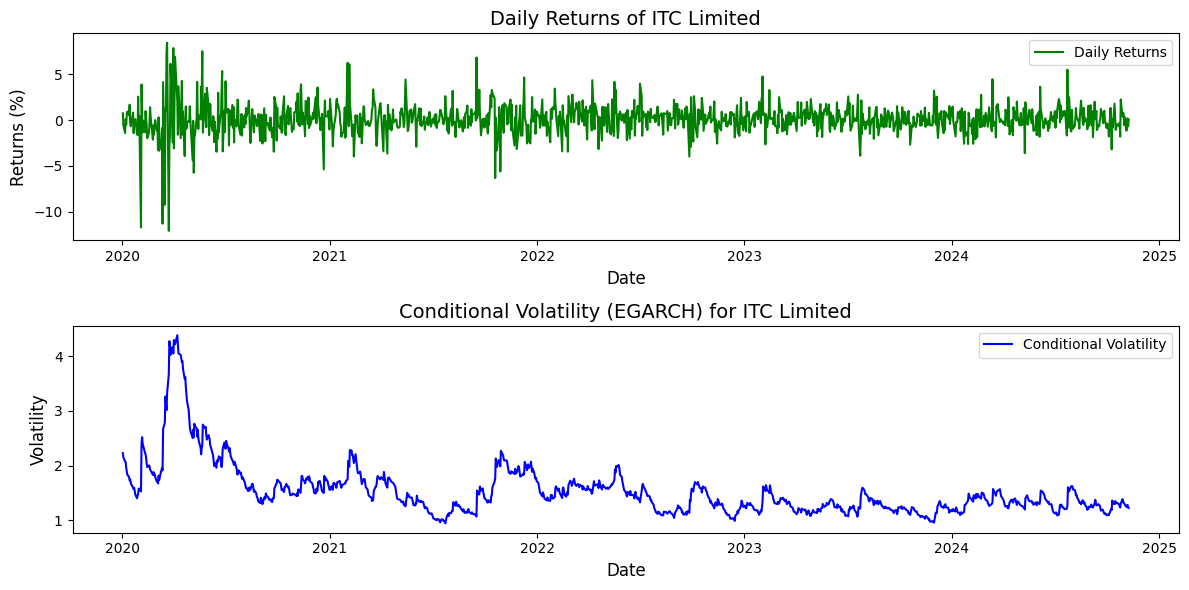

In [41]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from arch import arch_model

# Step 1: Data Collection
ticker = 'ITC.NS'  # ITC Limited's ticker symbol on NSE
data = yf.download(ticker, start='2020-01-01', end='2024-11-09')  # Adjust dates as needed

# Step 2: Data Preparation
data['Daily Returns (%)'] = (data['Adj Close'].pct_change()) * 100  # Percentage change in daily returns
data = data.dropna()  # Remove missing values

# Step 3: Fit EGARCH Model to Capture Volatility Clustering
# EGARCH allows us to model asymmetric volatility (positive vs. negative shocks)
returns = data['Daily Returns (%)']
model = arch_model(returns, vol='EGarch', p=1, q=1)
model_fit = model.fit(disp="off")

# Print the summary of the EGARCH model
print(model_fit.summary())

# Step 4: Extract Conditional Volatility (Model's Forecast of Volatility)
conditional_volatility = model_fit.conditional_volatility

# Step 5: Visualize Volatility Clustering
plt.figure(figsize=(12, 6))
plt.plot(data.index, conditional_volatility, color='blue', label='Conditional Volatility (EGARCH)')
plt.title('Conditional Volatility Forecasting (Volatility Clustering) for ITC Limited', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Volatility', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Optional: Plot Daily Returns vs Conditional Volatility to visualize the relationship
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(data.index, data['Daily Returns (%)'], color='green', label='Daily Returns')
plt.title('Daily Returns of ITC Limited', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Returns (%)', fontsize=12)
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(data.index, conditional_volatility, color='blue', label='Conditional Volatility')
plt.title('Conditional Volatility (EGARCH) for ITC Limited', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Volatility', fontsize=12)
plt.legend()

plt.tight_layout()
plt.show()


[*********************100%***********************]  1 of 1 completed


### Model Summary ###
                     Constant Mean - EGARCH Model Results                     
Dep. Variable:      Daily Returns (%)   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                     EGARCH   Log-Likelihood:               -2177.78
Distribution:                  Normal   AIC:                           4363.57
Method:            Maximum Likelihood   BIC:                           4383.94
                                        No. Observations:                 1203
Date:                Sat, Nov 09 2024   Df Residuals:                     1202
Time:                        15:30:59   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0998  2.234e-03     44.67

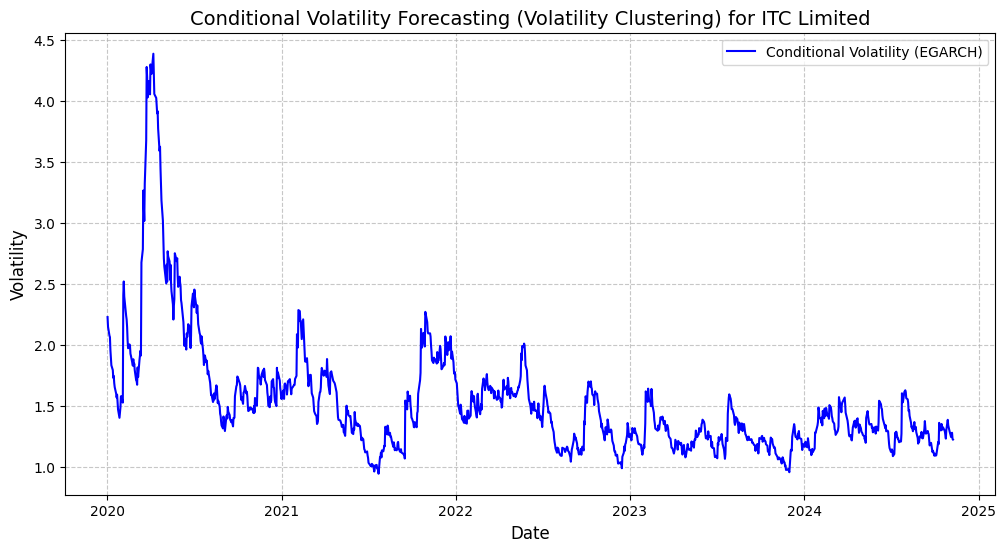


### Simple Facts for End Users ###
1. Volatility Clustering is when large price changes (either positive or negative) tend to be followed by more large changes.
2. The GARCH model is used to understand and forecast how volatility (market risk) changes over time based on past returns.
3. Conditional Volatility is the forecasted volatility, showing us how the market risk is expected to evolve.
4. By using this approach, we can predict future market risk and make better-informed decisions in managing investments.
5. In the plot, you will see periods of high volatility followed by low volatility, which shows the phenomenon of volatility clustering.


In [42]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from arch import arch_model

# Step 1: Data Collection
ticker = 'ITC.NS'  # ITC Limited's ticker symbol on NSE
data = yf.download(ticker, start='2020-01-01', end='2024-11-09')  # Adjust dates as needed

# Step 2: Data Preparation
data['Daily Returns (%)'] = (data['Adj Close'].pct_change()) * 100  # Percentage change in daily returns
data = data.dropna()  # Remove missing values

# Step 3: Fit EGARCH Model to Capture Volatility Clustering
# EGARCH allows us to model asymmetric volatility (positive vs. negative shocks)
returns = data['Daily Returns (%)']
model = arch_model(returns, vol='EGarch', p=1, q=1)
model_fit = model.fit(disp="off")

# Print the summary of the EGARCH model
print("### Model Summary ###")
print(model_fit.summary())

# Step 4: Extract Conditional Volatility (Model's Forecast of Volatility)
conditional_volatility = model_fit.conditional_volatility

# Step 5: Visualization of Volatility Clustering
plt.figure(figsize=(12, 6))
plt.plot(data.index, conditional_volatility, color='blue', label='Conditional Volatility (EGARCH)')
plt.title('Conditional Volatility Forecasting (Volatility Clustering) for ITC Limited', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Volatility', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Simple Facts about Volatility Clustering
print("\n### Simple Facts for End Users ###")
print("1. Volatility Clustering is when large price changes (either positive or negative) tend to be followed by more large changes.")
print("2. The GARCH model is used to understand and forecast how volatility (market risk) changes over time based on past returns.")
print("3. Conditional Volatility is the forecasted volatility, showing us how the market risk is expected to evolve.")
print("4. By using this approach, we can predict future market risk and make better-informed decisions in managing investments.")
print("5. In the plot, you will see periods of high volatility followed by low volatility, which shows the phenomenon of volatility clustering.")


[*********************100%***********************]  1 of 1 completed



### Backtesting Results ###
Total Number of Days: 1203
Total Number of VaR Breaches: 72
Expected Number of Breaches (at 95% confidence): 60.15
Observed Hit Ratio: 0.0599 (i.e., 5.99% of the days had a breach)
Kupiec Test p-value: 0.1265


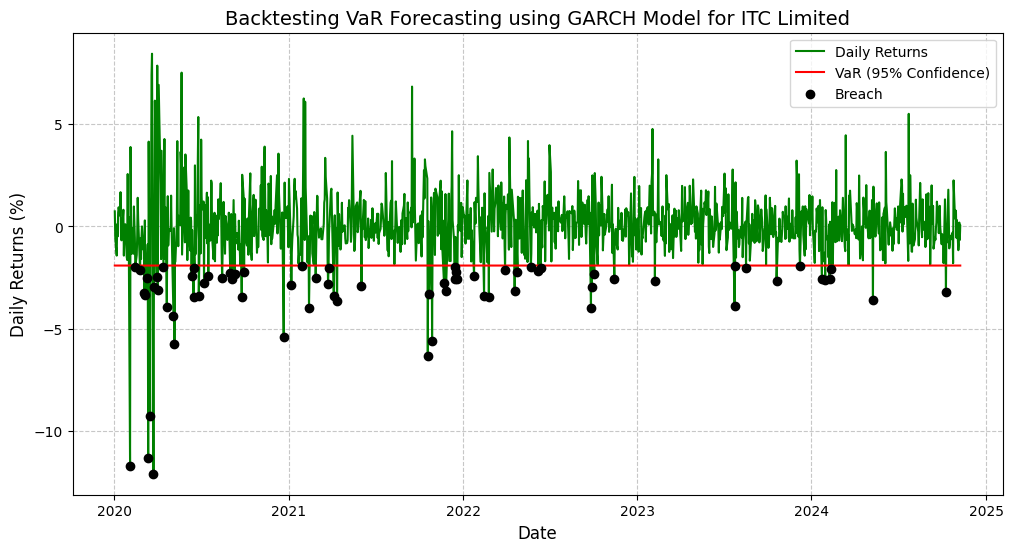

In [44]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from arch import arch_model

# Step 1: Data Collection
ticker = 'ITC.NS'  # ITC Limited's ticker symbol on NSE
data = yf.download(ticker, start='2020-01-01', end='2024-11-09')  # Adjust dates as needed

# Step 2: Data Preparation
data['Daily Returns (%)'] = (data['Adj Close'].pct_change()) * 100  # Percentage change in daily returns
data = data.dropna()  # Remove missing values

# Step 3: Fit EGARCH Model to Capture Volatility Clustering
returns = data['Daily Returns (%)']
model = arch_model(returns, vol='EGarch', p=1, q=1)
model_fit = model.fit(disp="off")

# Step 4: Forecast Volatility and Calculate VaR
confidence_level = 0.95
z_score = np.abs(np.percentile(np.random.normal(0, 1, 10000), (1 - confidence_level) * 100))  # Z-score for 95% confidence
forecast_horizon = 1  # 1-day VaR forecast

# Forecast volatility for 1-day horizon
forecast = model_fit.forecast(horizon=forecast_horizon)
forecast_volatility = np.sqrt(forecast.variance.values[-1, :])

# Calculate VaR for 1-day horizon
var_values = z_score * forecast_volatility[0]

# Step 5: Identify VaR Breaches
data['VaR'] = var_values  # Store forecasted VaR in the DataFrame
data['VaR Breach'] = data['Daily Returns (%)'] < -data['VaR']  # Breach if actual return is less than -VaR

# Step 6: Backtesting Results
num_breaches = data['VaR Breach'].sum()  # Count the number of breaches
total_days = len(data)
expected_breaches = total_days * (1 - confidence_level)  # Expected breaches at 95% confidence level

# Step 7: Calculate Hit Ratio and Backtest
hit_ratio = num_breaches / total_days  # Hit ratio: percentage of breaches
print(f"\n### Backtesting Results ###")
print(f"Total Number of Days: {total_days}")
print(f"Total Number of VaR Breaches: {num_breaches}")
print(f"Expected Number of Breaches (at {int(confidence_level * 100)}% confidence): {expected_breaches:.2f}")
print(f"Observed Hit Ratio: {hit_ratio:.4f} (i.e., {hit_ratio * 100:.2f}% of the days had a breach)")

# Step 8: Kupiec Test (Likelihood Ratio Test for VaR Backtesting)
# Kupiec Test compares the observed breaches against the expected breaches.
from scipy.stats import chi2

# Kupiec Likelihood Ratio Test
p_value = 1 - chi2.cdf((num_breaches - expected_breaches)**2 / expected_breaches, df=1)
print(f"Kupiec Test p-value: {p_value:.4f}")

# Step 9: Visualization of VaR Breaches
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Daily Returns (%)'], color='green', label='Daily Returns')
plt.plot(data.index, -data['VaR'], color='red', label=f'VaR (95% Confidence)')
plt.scatter(data.index[data['VaR Breach']], data['Daily Returns (%)'][data['VaR Breach']], color='black', label='Breach', zorder=5)
plt.title('Backtesting VaR Forecasting using GARCH Model for ITC Limited', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Daily Returns (%)', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


[*********************100%***********************]  1 of 1 completed



### Backtesting Results ###
Total Number of Days: 1203
Total Number of VaR Breaches: 74
Expected Number of Breaches (at 95% confidence): 60.15
Observed Hit Ratio: 0.0615 (i.e., 6.15% of the days had a breach)
Kupiec Test p-value: 0.0741


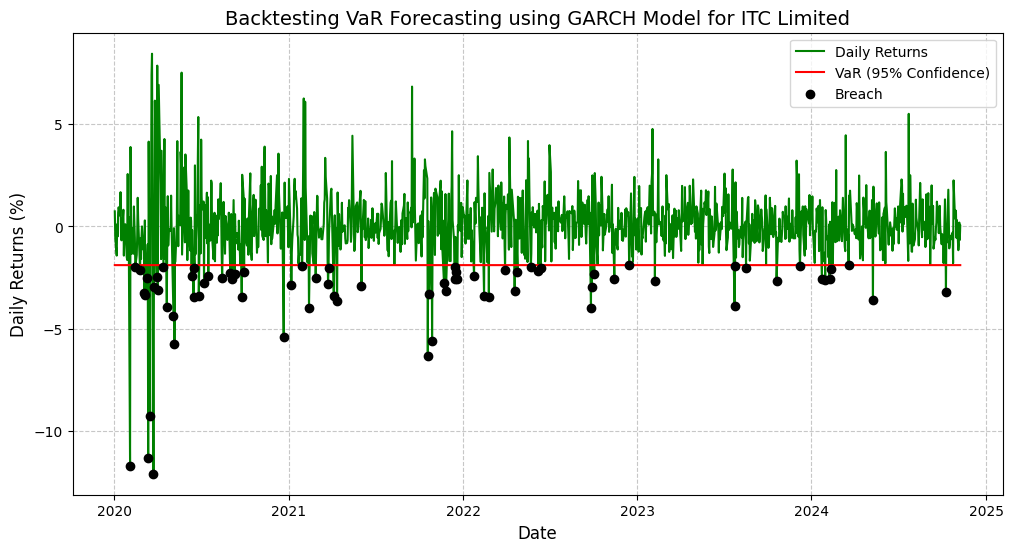

In [45]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from arch import arch_model
from scipy.stats import chi2

# Step 1: Data Collection
ticker = 'ITC.NS'  # ITC Limited's ticker symbol on NSE
data = yf.download(ticker, start='2020-01-01', end='2024-11-09')  # Adjust dates as needed

# Step 2: Data Preparation
data['Daily Returns (%)'] = (data['Adj Close'].pct_change()) * 100  # Percentage change in daily returns
data = data.dropna()  # Remove missing values

# Step 3: Fit EGARCH Model to Capture Volatility Clustering
returns = data['Daily Returns (%)']
model = arch_model(returns, vol='EGarch', p=1, q=1)
model_fit = model.fit(disp="off")

# Step 4: Forecast Volatility and Calculate VaR
confidence_level = 0.95
z_score = np.abs(np.percentile(np.random.normal(0, 1, 10000), (1 - confidence_level) * 100))  # Z-score for 95% confidence
forecast_horizon = 1  # 1-day VaR forecast

# Forecast volatility for 1-day horizon
forecast = model_fit.forecast(horizon=forecast_horizon)
forecast_volatility = np.sqrt(forecast.variance.values[-1, :])

# Calculate VaR for 1-day horizon
var_values = z_score * forecast_volatility[0]

# Step 5: Identify VaR Breaches
data['VaR'] = var_values  # Store forecasted VaR in the DataFrame
data['VaR Breach'] = data['Daily Returns (%)'] < -data['VaR']  # Breach if actual return is less than -VaR

# Step 6: Backtesting Results
num_breaches = data['VaR Breach'].sum()  # Count the number of breaches
total_days = len(data)
expected_breaches = total_days * (1 - confidence_level)  # Expected breaches at 95% confidence level

# Step 7: Calculate Hit Ratio and Backtest
hit_ratio = num_breaches / total_days  # Hit ratio: percentage of breaches
print(f"\n### Backtesting Results ###")
print(f"Total Number of Days: {total_days}")
print(f"Total Number of VaR Breaches: {num_breaches}")
print(f"Expected Number of Breaches (at {int(confidence_level * 100)}% confidence): {expected_breaches:.2f}")
print(f"Observed Hit Ratio: {hit_ratio:.4f} (i.e., {hit_ratio * 100:.2f}% of the days had a breach)")

# Step 8: Kupiec Test (Likelihood Ratio Test for VaR Backtesting)
# Kupiec Test compares the observed breaches against the expected breaches.
p_value = 1 - chi2.cdf((num_breaches - expected_breaches)**2 / expected_breaches, df=1)
print(f"Kupiec Test p-value: {p_value:.4f}")

# Step 9: Visualize VaR Breaches
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Daily Returns (%)'], color='green', label='Daily Returns')
plt.plot(data.index, -data['VaR'], color='red', label=f'VaR (95% Confidence)')
plt.scatter(data.index[data['VaR Breach']], data['Daily Returns (%)'][data['VaR Breach']], color='black', label='Breach', zorder=5)
plt.title('Backtesting VaR Forecasting using GARCH Model for ITC Limited', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Daily Returns (%)', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()
